# Тестовое задание "Аналитика рекламы"

**Скороход А.В.**

In [69]:
import json

import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt

In [2]:
#Загрузим данные
df = pd.read_csv('C:\\Users\\Shito\\Downloads\\us events ad_revenue filtered 03.02-07.02.csv', sep=',')
df.head()

,profile_id,os_version,device_manufacturer,device_model,device_type,device_locale,event_name,event_json,event_datetime,event_timestamp,event_receive_datetime,event_receive_timestamp,connection_type,operator_name,country_iso_code,city
0,JLjpGzDHBQm,11,Samsung,Galaxy Tab S6,tablet,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-04 20:02:28,1643994148,2022-02-06 17:58:19,1644159499,wifi,NaN,US,Norwalk
1,JLjpGzDHBQm,11,Samsung,Galaxy Tab S6,tablet,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-04 20:02:45,1643994165,2022-02-06 17:58:19,1644159499,wifi,NaN,US,Norwalk
2,JLkVacrzHY6,11,Google,Pixel 2,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-05 17:53:05,1644072785,2022-02-06 16:59:29,1644155969,wifi,Verizon,US,Charlotte
3,JMC6wG3cX0f,10,Samsung,Galaxy S9,phone,en_US,c_ad_revenue,"{""ad_type"":""int"",""placement"":""next_level"",""vie...",2022-02-06 17:09:01,1644156541,2022-02-06 17:09:24,1644156564,wifi,T-Mobile,US,Cocoa
4,JLzWWTJfi1b,10,Samsung,Galaxy S9,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-06 17:15:38,1644156938,2022-02-06 17:16:16,1644156976,cell,Verizon,US,NaN


In [13]:
df.shape

(860079, 16)

In [7]:
#Рассмотрим строку столбца, содержащего строку, похожую на словарь
json.loads(df.event_json.loc[0])

{'ad_type': 'banner',
 'placement': '',
 'view_index': 1,
 'session_view_index': 0,
 'cur_ticks': 637795729492245130,
 'session_length': 705.8807,
 'revenue': 0.000510313,
 'ads_ltv': 0.487876676518837,
 'ecpm_sma': 0.511508107185364,
 'normalized_ecpm_sma': 0.511508107185364,
 'value': 0.000510313,
 'currency': 'USD',
 'ad_country_code': 'US',
 'network_name': 'Google AdMob',
 'ad_unit_id': '64c6b1114ea8c1cc',
 'ad_network_placement': 'ca-app-pub-7511632782617496/8825263691',
 'creativeId': 'CJ3XirfD5vUCFYPnKAUdG3MOYQ'}

In [3]:
#Раскроем информацию о событие, представленную словарем, в отдельные колонки
full_data = pd.concat((pd.DataFrame(df.event_json.apply(json.loads).to_list()), df), axis=1)
full_data.head()

,ad_type,placement,view_index,session_view_index,cur_ticks,session_length,revenue,ads_ltv,ecpm_sma,normalized_ecpm_sma,...,event_name,event_json,event_datetime,event_timestamp,event_receive_datetime,event_receive_timestamp,connection_type,operator_name,country_iso_code,city
0,banner,,1,0,637795729492245130,705.88070,0.000510,0.487877,0.511508,0.511508,...,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-04 20:02:28,1643994148,2022-02-06 17:58:19,1644159499,wifi,NaN,US,Norwalk
1,banner,,1,0,637795729659949790,722.65120,0.000510,0.488387,0.511389,0.511389,...,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-04 20:02:45,1643994165,2022-02-06 17:58:19,1644159499,wifi,NaN,US,Norwalk
2,banner,,1,0,637796515863735930,431.81290,0.002386,0.678479,0.928597,0.928597,...,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-05 17:53:05,1644072785,2022-02-06 16:59:29,1644155969,wifi,Verizon,US,Charlotte
3,int,next_level,1,1,637797353426827330,125.94960,0.013894,0.013894,13.782633,13.893784,...,c_ad_revenue,"{""ad_type"":""int"",""placement"":""next_level"",""vie...",2022-02-06 17:09:01,1644156541,2022-02-06 17:09:24,1644156564,wifi,T-Mobile,US,Cocoa
4,banner,,1,0,637797357392197840,12.71129,0.006828,0.060571,1.660282,1.660282,...,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-06 17:15:38,1644156938,2022-02-06 17:16:16,1644156976,cell,Verizon,US,NaN


In [12]:
full_data.shape

(860079, 33)

In [14]:
#Рассмотрим, чем описывается одна рекламная сессия
full_data.loc[0]

ad_type                                                               banner
placement                                                                   
view_index                                                                 1
session_view_index                                                         0
cur_ticks                                                 637795729492245130
session_length                                                      705.8807
revenue                                                              0.00051
ads_ltv                                                             0.487877
ecpm_sma                                                            0.511508
normalized_ecpm_sma                                                 0.511508
value                                                                0.00051
currency                                                                 USD
ad_country_code                                                           US

In [20]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 860079 entries, 0 to 860078
Data columns (total 33 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   ad_type                  860079 non-null  object 
 1   placement                860079 non-null  object 
 2   view_index               860079 non-null  int64  
 3   session_view_index       860079 non-null  int64  
 4   cur_ticks                860079 non-null  int64  
 5   session_length           860079 non-null  float64
 6   revenue                  860079 non-null  float64
 7   ads_ltv                  860079 non-null  float64
 8   ecpm_sma                 860079 non-null  float64
 9   normalized_ecpm_sma      860079 non-null  float64
 10  value                    860079 non-null  float64
 11  currency                 860079 non-null  object 
 12  ad_country_code          860079 non-null  object 
 13  network_name             860079 non-null  object 
 14  ad_u

In [4]:
counts = full_data.nunique()
counts

ad_type                         3
placement                       9
view_index                    417
session_view_index             75
cur_ticks                  860073
session_length             831628
revenue                    178126
ads_ltv                    856022
ecpm_sma                   779543
normalized_ecpm_sma        779551
value                      178126
currency                        1
ad_country_code                 9
network_name                    4
ad_unit_id                      3
ad_network_placement           27
creativeId                 509066
profile_id                   4226
os_version                     11
device_manufacturer            34
device_model                  284
device_type                     2
device_locale                   9
event_name                      1
event_json                 860076
event_datetime             322812
event_timestamp            322812
event_receive_datetime     180237
event_receive_timestamp    180237
connection_typ

In [5]:
#Сократим вес датасета подбором более подходящих типов данных
for i in full_data.select_dtypes(include=['object']).columns:
    if counts.loc[i] < 300:
        full_data[i] = full_data[i].astype('category')
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 860079 entries, 0 to 860078
Data columns (total 33 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   ad_type                  860079 non-null  category
 1   placement                860079 non-null  category
 2   view_index               860079 non-null  int64   
 3   session_view_index       860079 non-null  int64   
 4   cur_ticks                860079 non-null  int64   
 5   session_length           860079 non-null  float64 
 6   revenue                  860079 non-null  float64 
 7   ads_ltv                  860079 non-null  float64 
 8   ecpm_sma                 860079 non-null  float64 
 9   normalized_ecpm_sma      860079 non-null  float64 
 10  value                    860079 non-null  float64 
 11  currency                 860079 non-null  category
 12  ad_country_code          860079 non-null  category
 13  network_name             860079 non-null  ca

In [45]:
full_data['eCPM'] = full_data.revenue*1000

**Пропущенные значения**   

Пропущенные значения присутствуют в столбцах:   
   * profile_id - идентификатор пользователя   
   * operator_name   
   * city - город, локация пользователя   

Записи без индентификатора пользователя можно не рассматривать, а можно рассматривать как некоего пользователя анонима, и включить его в статистику как единого пользователя. Это будет профиль (описание) пользователей, предпочитающих не регестрироваться (не идентифицировать себя). Однако, это всего лишь предположение, поэтому в статистике пользователи не идентифицировавшие себя, не будут рассматриваться (если необходима конкретизация до пользователя). Для города (локации) пользователя можно было бы так же рассматривать как поведение пользователя, предпочитающего анонимность. Столбец operator_name не участвует в рассмотрении (задании).

## 1. Для каждого формата рекламы:
### a. построить распределение средних eCPM-ов юзеров

In [47]:
eCPM_mean = full_data[['ad_type', 
                       'profile_id',
                       'eCPM'
                      ]].groupby(by=['profile_id', 'ad_type']).mean().dropna().reset_index()
eCPM_mean

,profile_id,ad_type,eCPM
0,JL00qCZH1HV,banner,3.183940
1,JL015rw9vmN,banner,1.160748
2,JL015rw9vmN,int,21.983199
3,JL01aCdFTJy,banner,0.740097
4,JL01aCdFTJy,int,11.965651
...,...,...,...
8789,JMLmauy744E,int,23.429988
8790,JMLt54Rmui5,banner,0.300763
8791,JMLt54Rmui5,int,23.706346
8792,JMML6MrvRA4,banner,0.419296


Text(0.5, 1.0, 'rv')

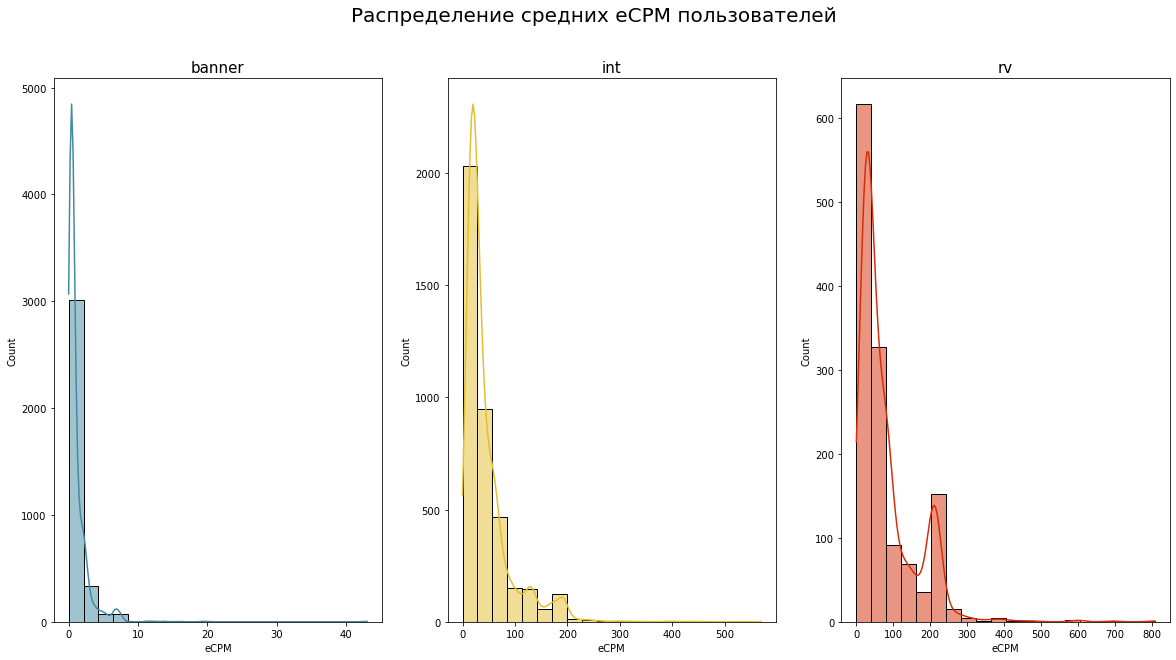

In [120]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))

sns.histplot(x='eCPM', kde=True, data=eCPM_mean[eCPM_mean.ad_type=='banner'], bins=20, ax=ax1, color='#438AA0')
sns.histplot(x='eCPM', kde=True, data=eCPM_mean[eCPM_mean.ad_type=='int'], bins=20, ax=ax2, color='#E3BE31')
sns.histplot(x='eCPM', kde=True, data=eCPM_mean[eCPM_mean.ad_type=='rv'], bins=20, ax=ax3, color='#D62D06')

fig.suptitle('Распределение средних eCPM пользователей', size=20)
ax1.set_title('banner', size=15)
ax2.set_title('int', size=15)
ax3.set_title('rv', size=15)

### b. отобразить средние eCPM-ы по городам, версиям ОС

Text(0.5, 1.0, 'rv')

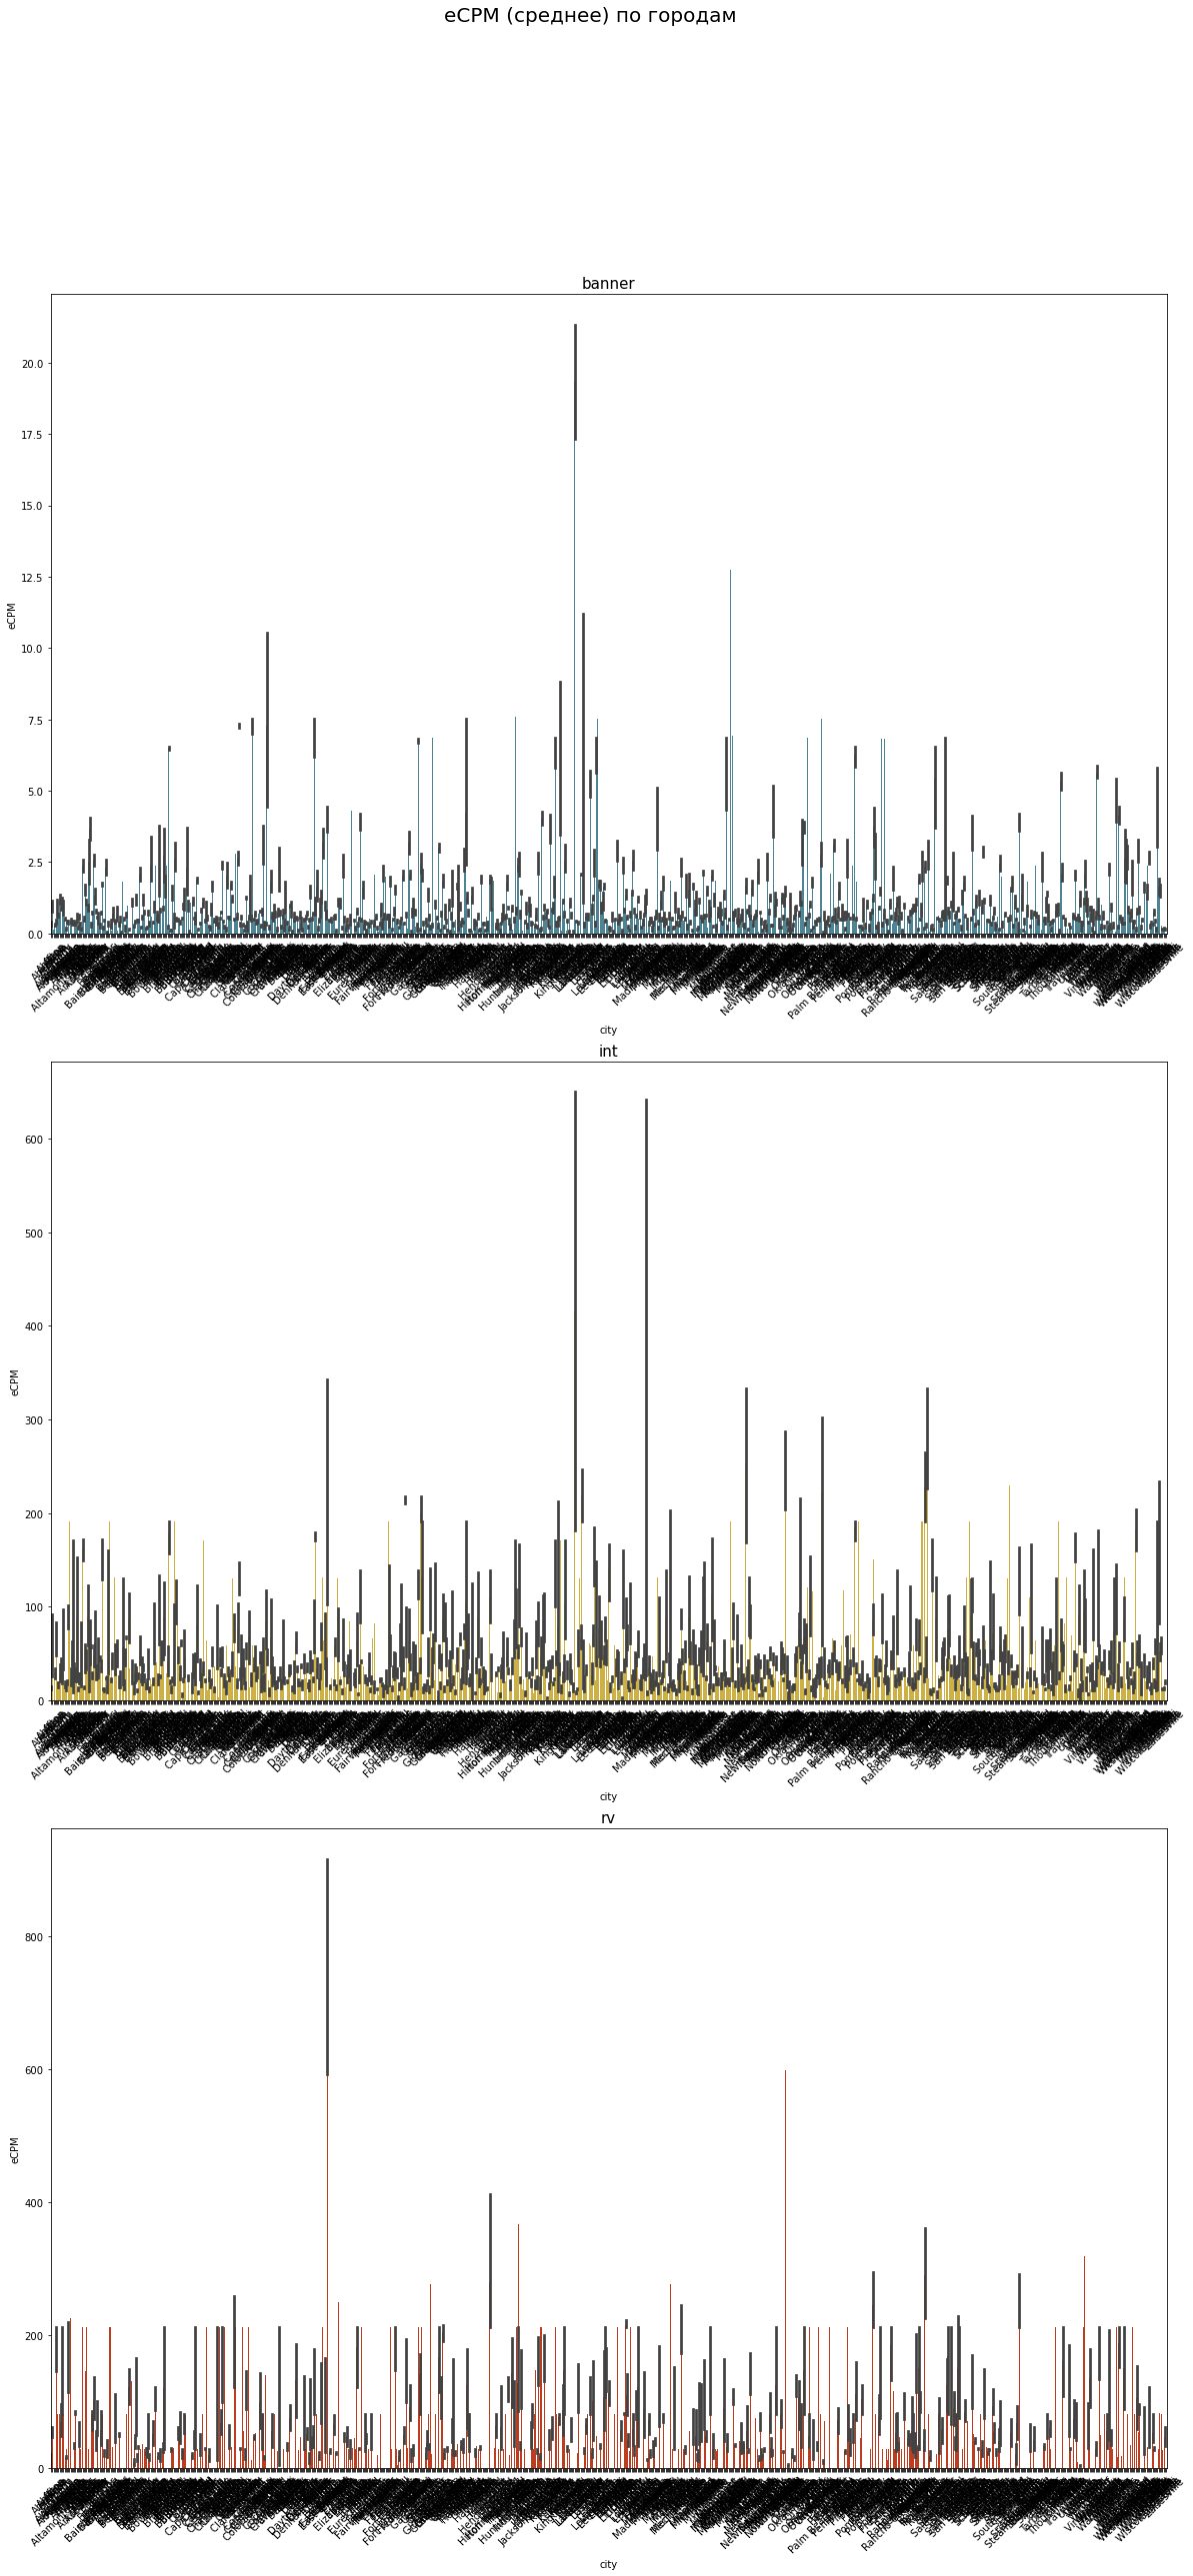

In [247]:
x_ticks = pd.Series(full_data.city.unique()).sort_values()

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(20, 40))

ax1.tick_params(axis='x', rotation=45, labelsize=10)
ax2.tick_params(axis='x', rotation=45, labelsize=10)
ax3.tick_params(axis='x', rotation=45, labelsize=10)

sns.barplot(data=full_data[full_data.ad_type=='banner'], x='city', y='eCPM', ax=ax1, color='#438AA0', order=x_ticks)
sns.barplot(data=full_data[full_data.ad_type=='int'], x='city', y='eCPM', ax=ax2, color='#E3BE31', order=x_ticks)
sns.barplot(data=full_data[full_data.ad_type=='rv'], x='city', y='eCPM', ax=ax3, color='#D62D06', order=x_ticks)

fig.suptitle('eCPM (среднее) по городам', size=20)
ax1.set_title('banner', size=15)
ax2.set_title('int', size=15)
ax3.set_title('rv', size=15)

Text(0.5, 1.0, 'rv')

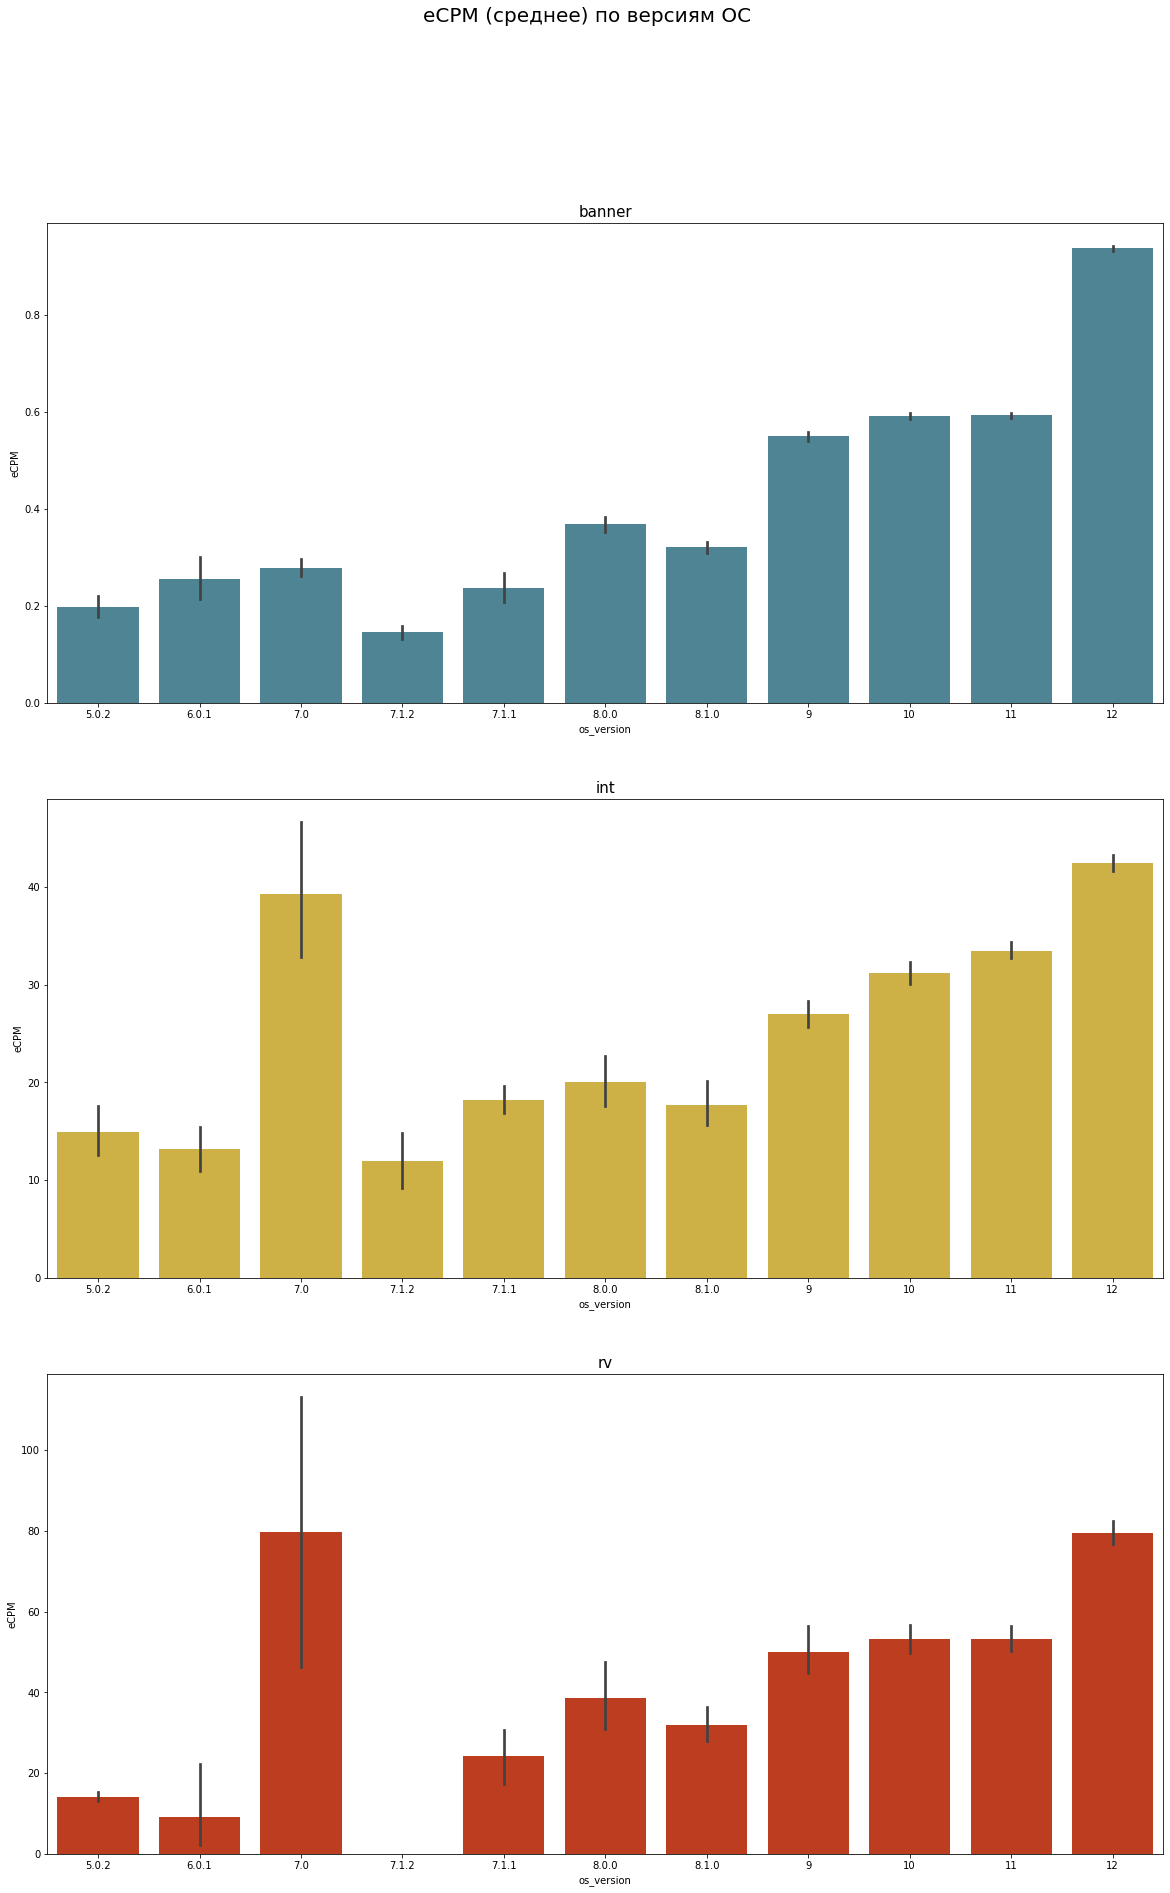

In [223]:
x_ticks = pd.DataFrame(full_data.os_version.unique())
x_ticks[1] = x_ticks[0].apply(lambda x: int(x.split('.')[0]))
x_ticks.sort_values(by=[1, 0], inplace=True)

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(20, 30))

sns.barplot(data=full_data[full_data.ad_type=='banner'], x='os_version', y='eCPM', ax=ax1, color='#438AA0', order=x_ticks[0])
sns.barplot(data=full_data[full_data.ad_type=='int'], x='os_version', y='eCPM', ax=ax2, color='#E3BE31', order=x_ticks[0])
sns.barplot(data=full_data[full_data.ad_type=='rv'], x='os_version', y='eCPM', ax=ax3, color='#D62D06', order=x_ticks[0])

fig.suptitle('eCPM (среднее) по версиям ОС', size=20)
ax1.set_title('banner', size=15)
ax2.set_title('int', size=15)
ax3.set_title('rv', size=15)

### c. отобразить суммарные доходы по городам, версиям ОС

Text(0.5, 1.0, 'rv')

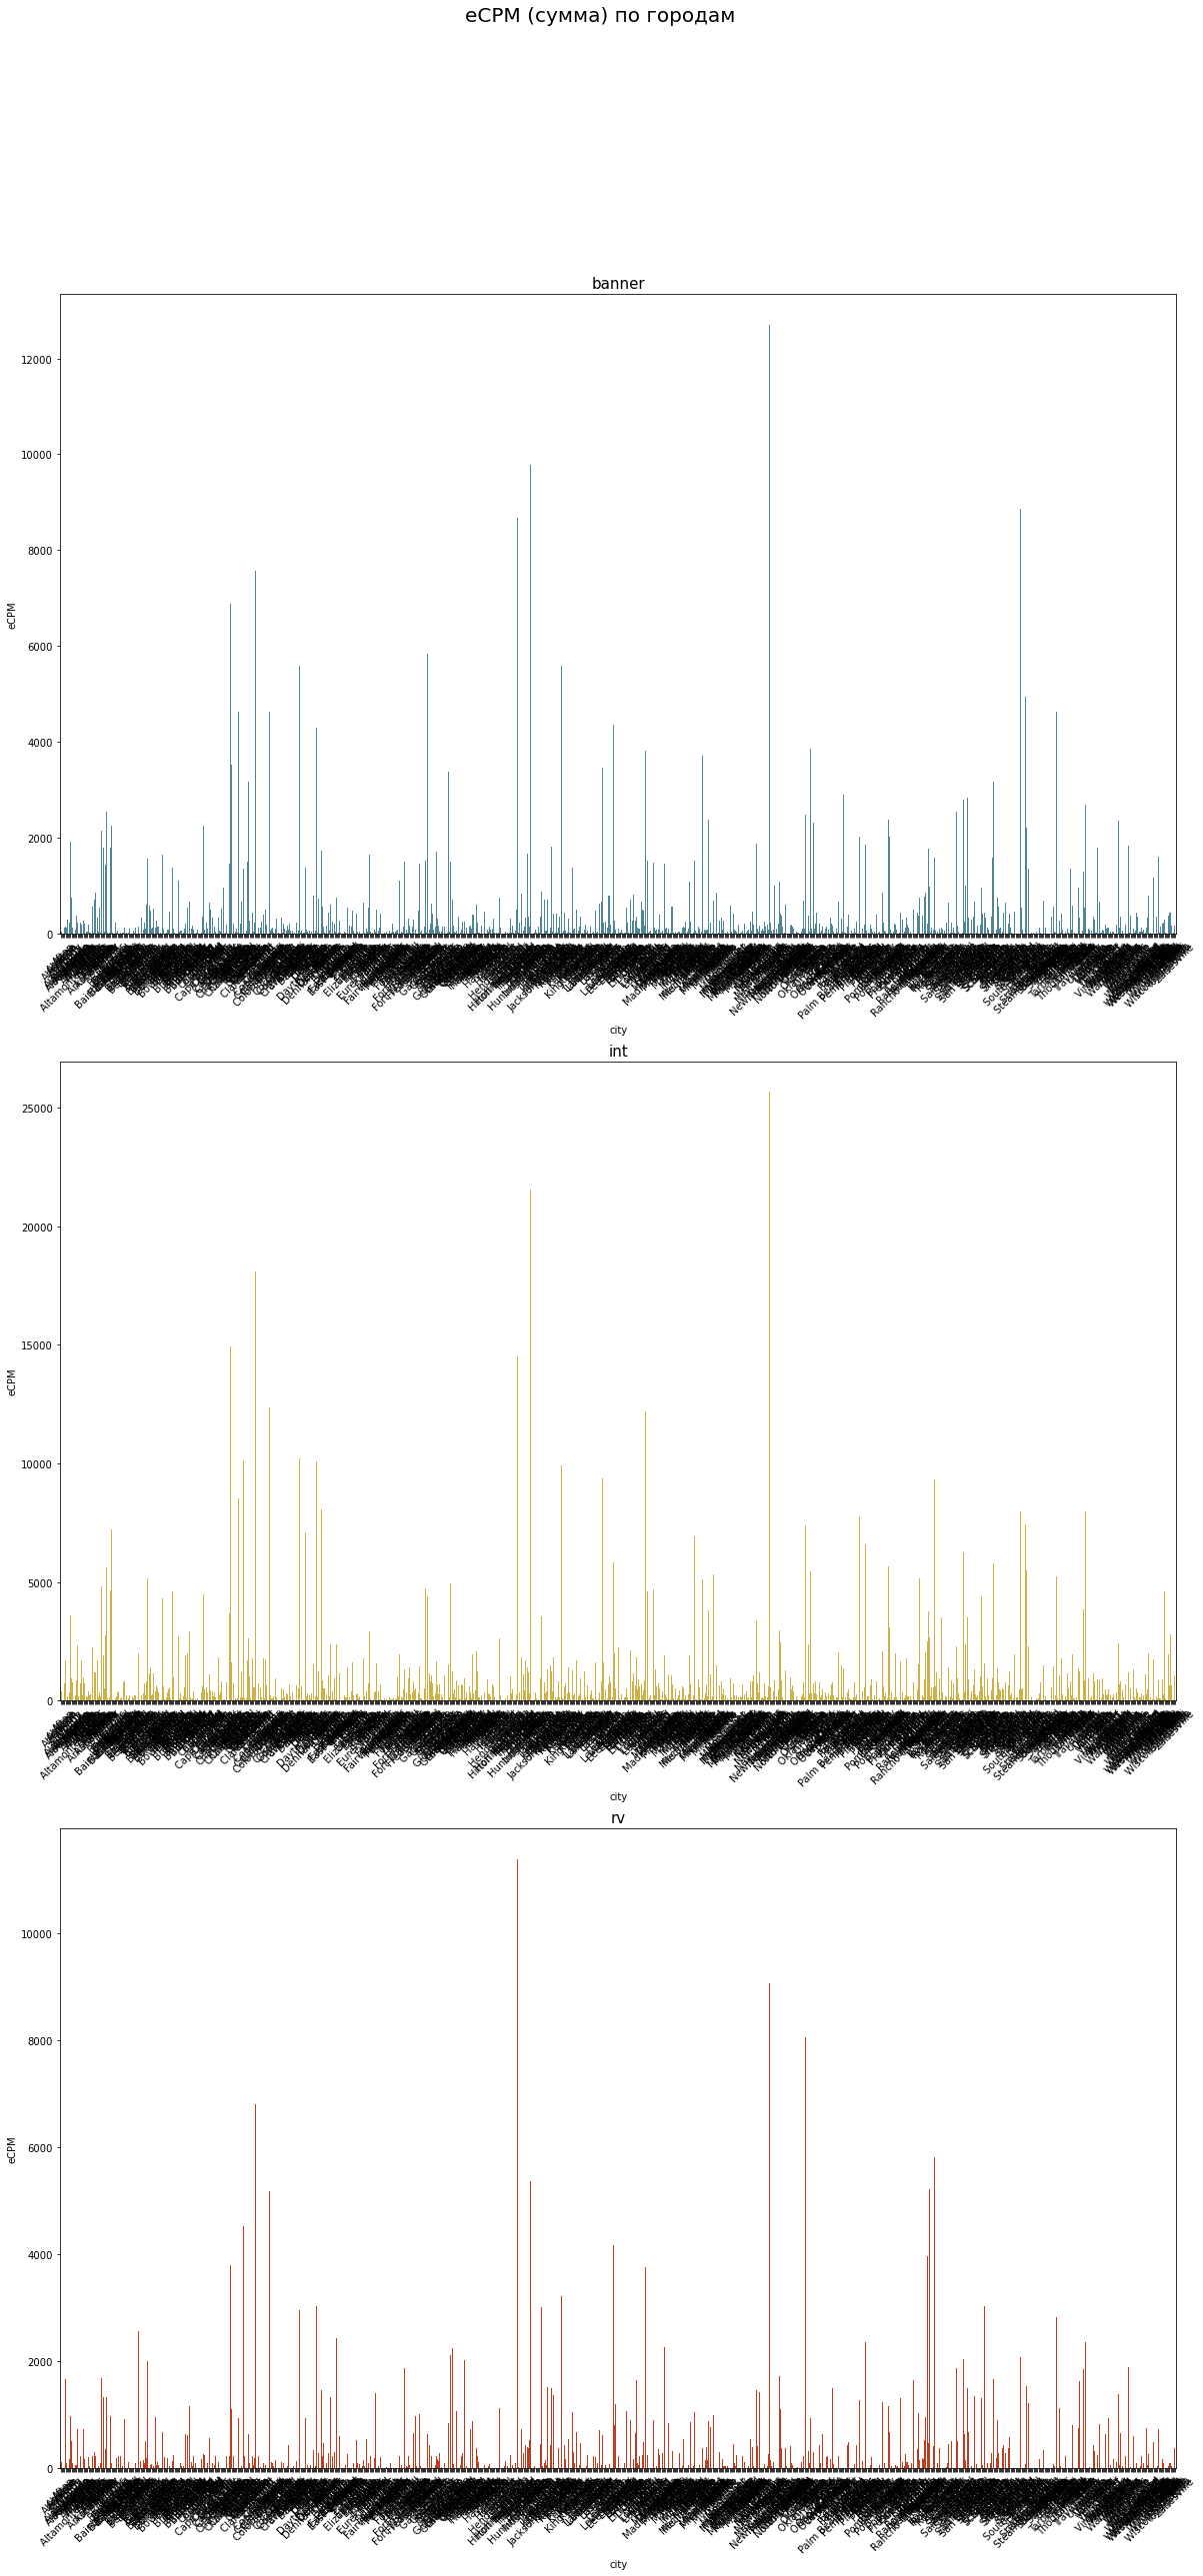

In [244]:
x_ticks = pd.Series(full_data.city.unique()).sort_values()

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(20, 40))

ax1.tick_params(axis='x', rotation=45, labelsize=10)
ax2.tick_params(axis='x', rotation=45, labelsize=10)
ax3.tick_params(axis='x', rotation=45, labelsize=10)

sns.barplot(data=full_data[full_data.ad_type=='banner'], x='city', y='eCPM', ax=ax1, color='#438AA0', estimator=sum, ci=None, order=x_ticks)
sns.barplot(data=full_data[full_data.ad_type=='int'], x='city', y='eCPM', ax=ax2, color='#E3BE31', estimator=sum, ci=None, order=x_ticks)
sns.barplot(data=full_data[full_data.ad_type=='rv'], x='city', y='eCPM', ax=ax3, color='#D62D06', estimator=sum, ci=None, order=x_ticks)

fig.suptitle('eCPM (сумма) по городам', size=20)
ax1.set_title('banner', size=15)
ax2.set_title('int', size=15)
ax3.set_title('rv', size=15)

Text(0.5, 1.0, 'rv')

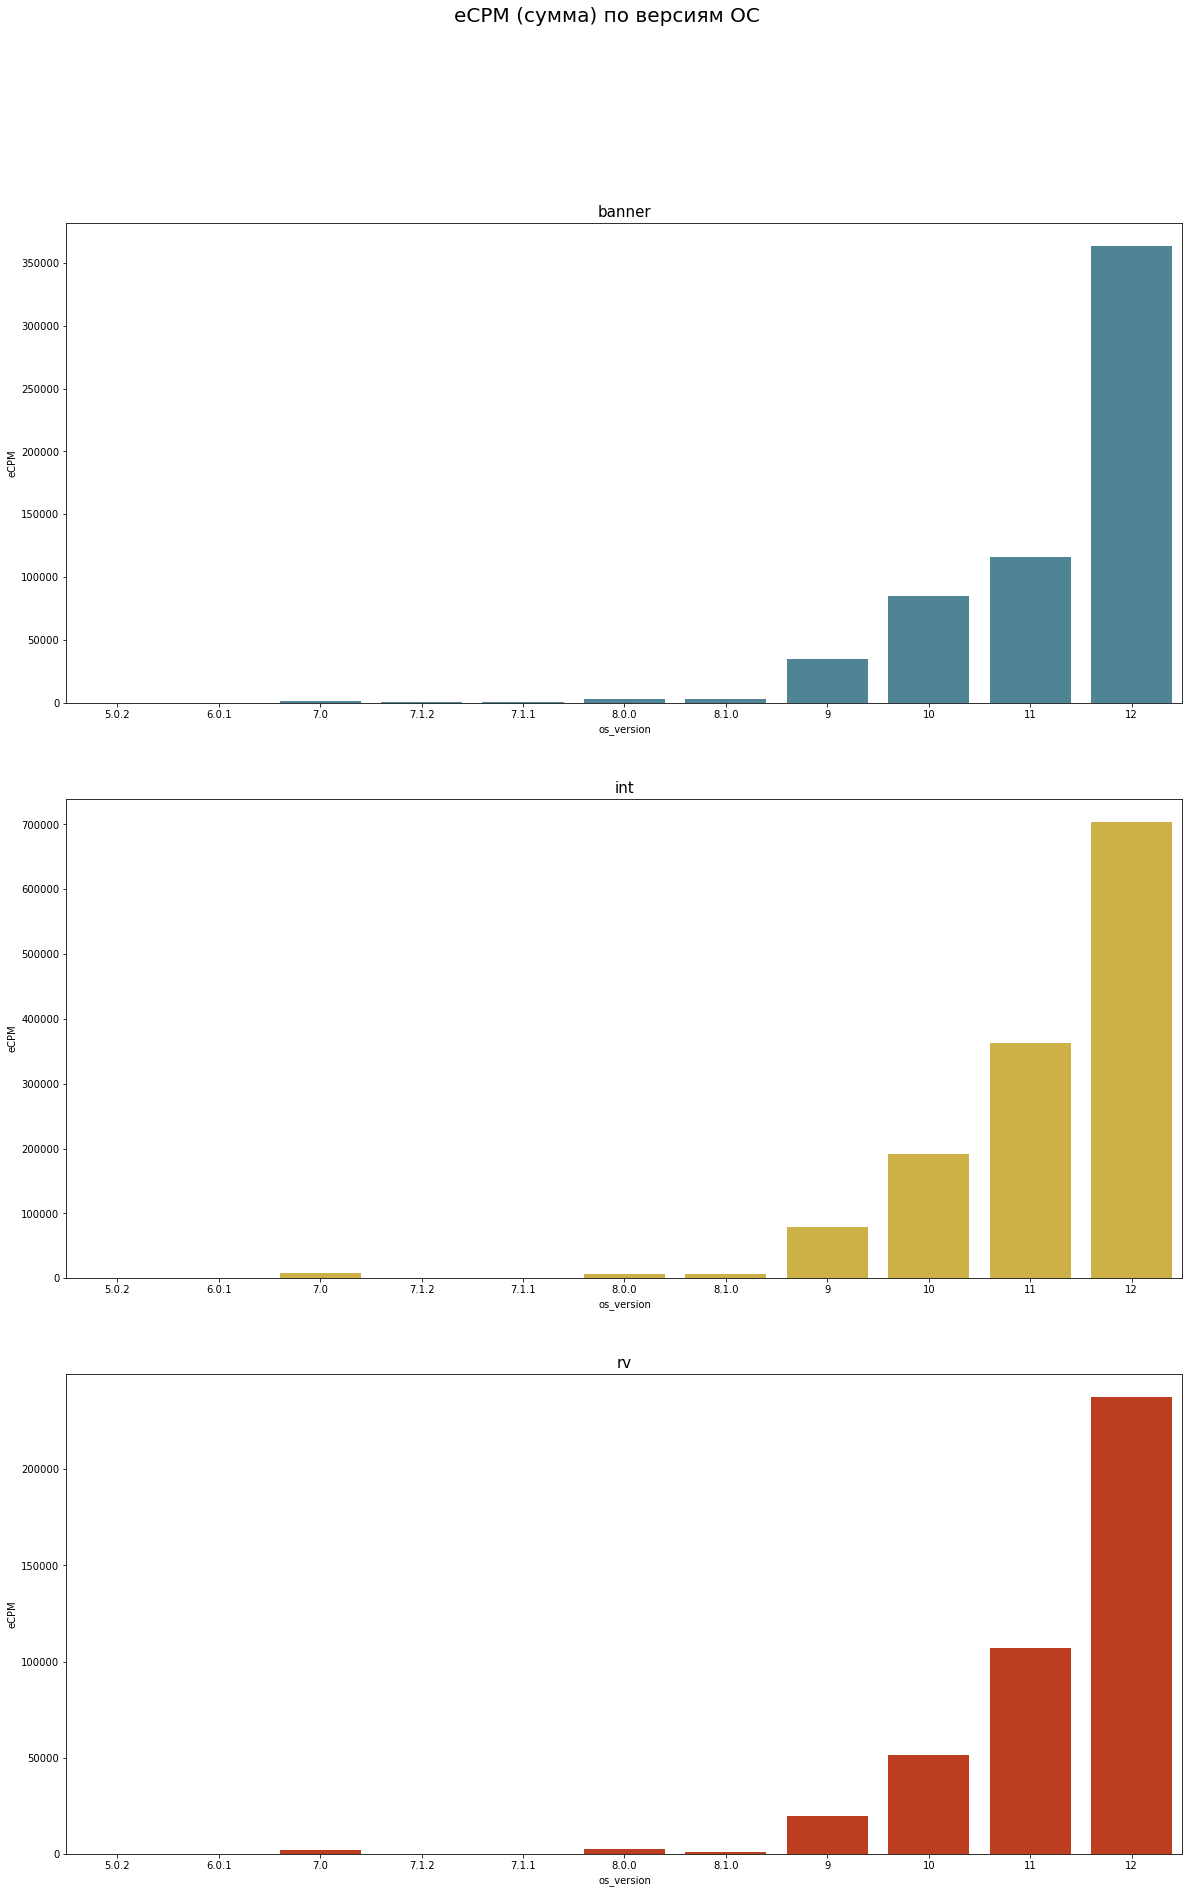

In [225]:
x_ticks = pd.DataFrame(full_data.os_version.unique())
x_ticks[1] = x_ticks[0].apply(lambda x: int(x.split('.')[0]))
x_ticks.sort_values(by=[1, 0], inplace=True)

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(20, 30))

sns.barplot(data=full_data[full_data.ad_type=='banner'], x='os_version', y='eCPM', ax=ax1, color='#438AA0', order=x_ticks[0], estimator=sum, ci=None)
sns.barplot(data=full_data[full_data.ad_type=='int'], x='os_version', y='eCPM', ax=ax2, color='#E3BE31', order=x_ticks[0], estimator=sum, ci=None)
sns.barplot(data=full_data[full_data.ad_type=='rv'], x='os_version', y='eCPM', ax=ax3, color='#D62D06', order=x_ticks[0], estimator=sum, ci=None)

fig.suptitle('eCPM (сумма) по версиям ОС', size=20)
ax1.set_title('banner', size=15)
ax2.set_title('int', size=15)
ax3.set_title('rv', size=15)

## 2. Учесть статистическую значимость для п.1b (отобразить, отфильтровать незначимое или хотя бы прокомментировать). Объяснить решение.

На самом деле не очень ясно из формулировки задания статистическая значимост чего долдна расчитываться (какая нуль гипотеза). Что такое есть незначимое. Пусть ищется статистическая значимость различия средних погруппам. Для городов проверить статистическую значимость различия выборок между городами сложно, так как это составит 920х920 вычислений. В данном решении приведем сравнение по группам для различных операционных систем. Чтобы получить информацию о разнице городов/ОС можно выбрать группу максимальной средней доходности и определить группы статистически различимы/не различимы с максимальной.   
Так же может быть рассмотрена разница средних по городам/версиям ОС в разрезе вида рекламы.



**Различия по версиям ОС для рекламы типа баннер:** 

Будем использовать критерий Манна-Уитни, так как тип распределения величины eCPM неизвестно, а данные групп (городов или ОС) не зависят друг от друга.

In [275]:
stats = np.zeros((12, 12))
pvalues = np.zeros((12,12))
for n, i in tqdm_notebook(enumerate(full_data.os_version.unique()), total=12):
    for m, j in enumerate(full_data.os_version.unique()):
        stats[n,m], pvalues[n,m] = mannwhitneyu(full_data.eCPM[(full_data.os_version == i)&(full_data.ad_type=='banner')], 
                                                full_data.eCPM[(full_data.os_version==j)&(full_data.ad_type=='banner')])

C:\Users\Shito\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


  0%|          | 0/12 [00:00<?, ?it/s]

Text(0.5, 1.0, '')

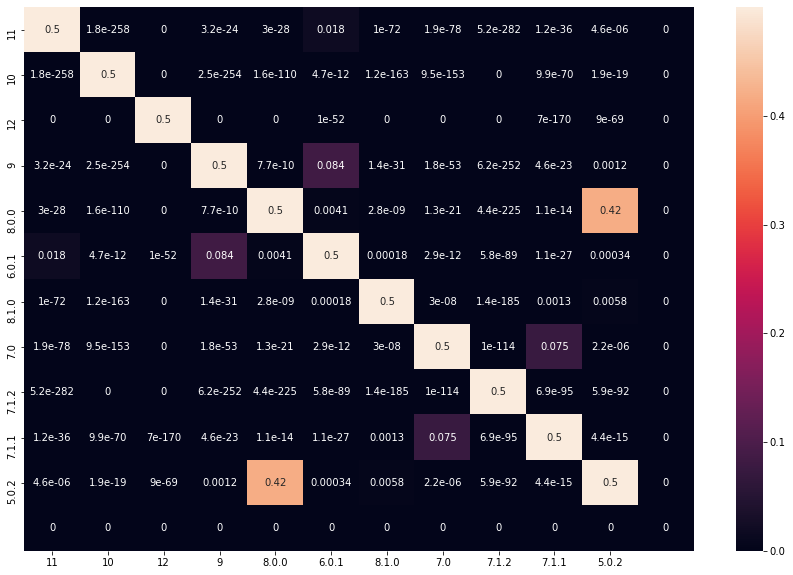

In [276]:
fig, ax = plt.subplots(figsize=(15,10))

sns.heatmap(pvalues, annot=True, xticklabels = full_data.os_version.unique(), yticklabels = full_data.os_version.unique())

ax.set_title('')

<AxesSubplot:xlabel='os_version', ylabel='eCPM'>

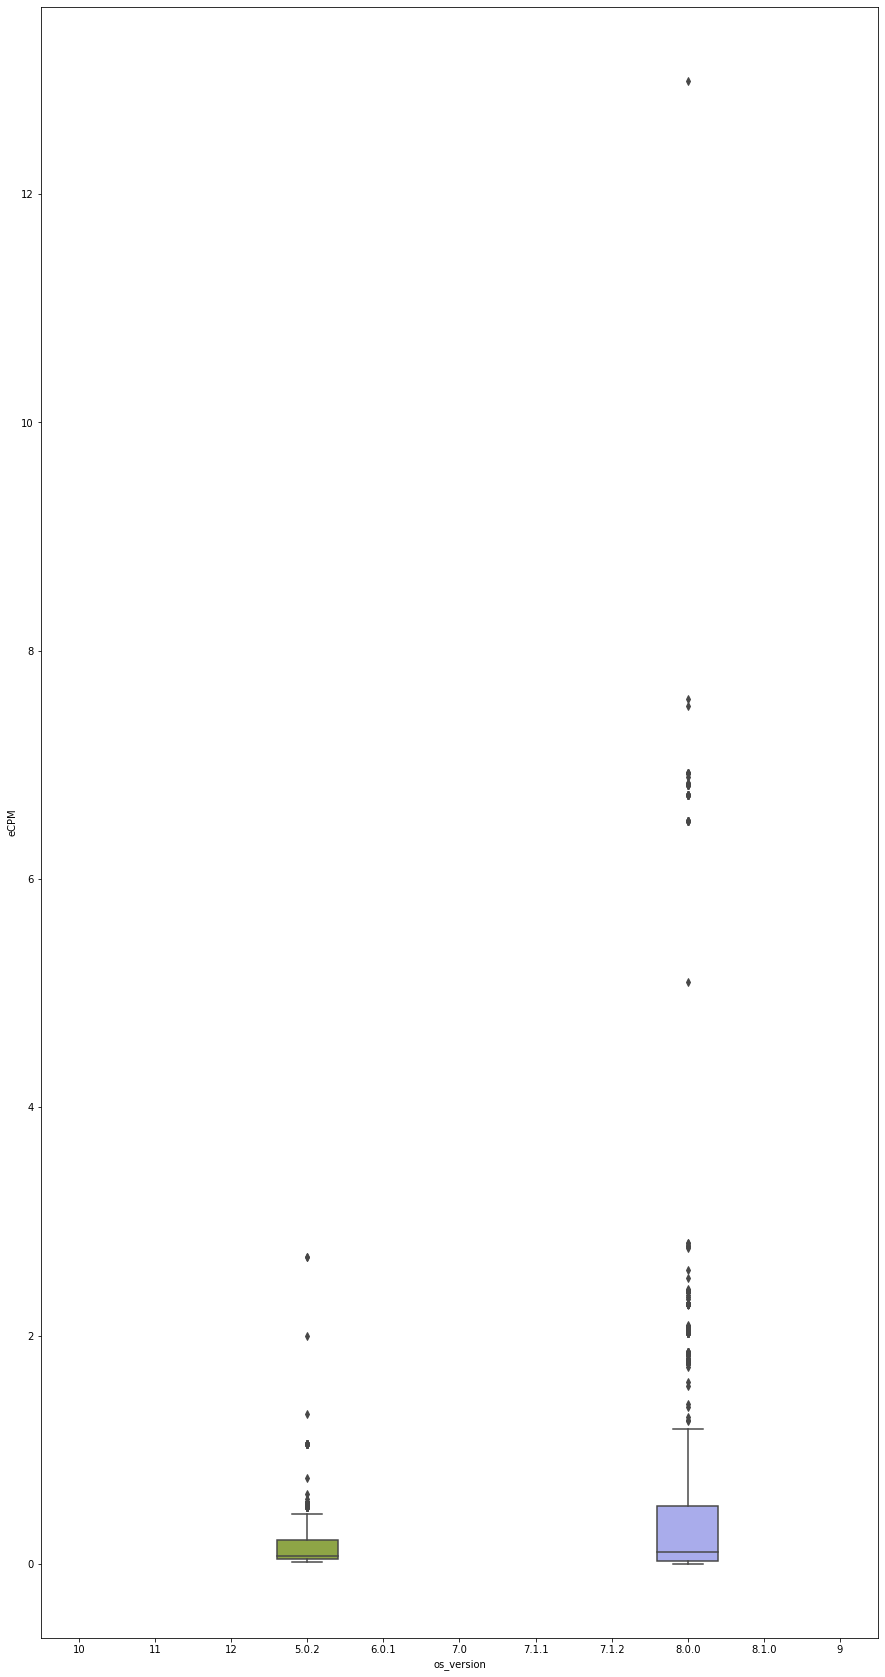

In [289]:
fig, ax = plt.subplots(figsize=(15,30))
data=full_data[((full_data.os_version=='5.0.2')|(full_data.os_version=='8.0.0'))&(full_data.ad_type=='banner')]
sns.boxplot(x='os_version', y='eCPM', data=data)

Статистически не отличаются между собой только подвыборки 5.0.2 и 8.0.0 ОС, 7.1.1 и 7.0 ОС, а также 6.0.1 и 9 ОС. Таким образом, можем заключить, что использовать информацию об ОС для определения уровеня дохода от банеров имеет смысл. 

**Различие между типами рекламы для городов/версии ОС:**

In [295]:
for i in set(full_data.ad_type):
    for j in set(full_data.ad_type):
        print(i, j, 
              mannwhitneyu(full_data[['city', 'ad_type', 'eCPM']][full_data.ad_type==i].groupby(by=['city']).mean(),
                           full_data[['city', 'ad_type', 'eCPM']][full_data.ad_type==j].groupby(by=['city']).mean()))

int int MannwhitneyuResult(statistic=377580.5, pvalue=0.49998093213825107)
int banner MannwhitneyuResult(statistic=755.0, pvalue=2.688130227700697e-282)
int rv MannwhitneyuResult(statistic=121260.0, pvalue=5.242257489639264e-31)
banner int MannwhitneyuResult(statistic=755.0, pvalue=2.688130227700697e-282)
banner banner MannwhitneyuResult(statistic=366368.0, pvalue=0.4999804962310309)
banner rv MannwhitneyuResult(statistic=138.0, pvalue=1.9264365718146295e-195)
rv int MannwhitneyuResult(statistic=121260.0, pvalue=5.242257489639264e-31)
rv banner MannwhitneyuResult(statistic=138.0, pvalue=1.9264365718146295e-195)
rv rv MannwhitneyuResult(statistic=103058.0, pvalue=0.4999494943504538)


Каждый тип рекламы не схож ни с каким другим типом рекламы, в разрезе среднего по городам. 

In [332]:
for i in set(full_data.ad_type):
    for j in set(full_data.ad_type):
        print(i, j, 
              mannwhitneyu(full_data[['os_version', 'ad_type', 'eCPM']][full_data.ad_type==i].groupby(by=['os_version']).mean(),
                           full_data[['os_version', 'ad_type', 'eCPM']][full_data.ad_type==j].groupby(by=['os_version']).mean()))

int int MannwhitneyuResult(statistic=60.5, pvalue=0.48686323205405124)
int banner MannwhitneyuResult(statistic=0.0, pvalue=4.0757680638716086e-05)
int rv MannwhitneyuResult(statistic=30.0, pvalue=0.024422032087137134)
banner int MannwhitneyuResult(statistic=0.0, pvalue=4.0757680638716086e-05)
banner banner MannwhitneyuResult(statistic=60.5, pvalue=0.48686323205405124)
banner rv MannwhitneyuResult(statistic=0.0, pvalue=4.0757680638716086e-05)
rv int MannwhitneyuResult(statistic=30.0, pvalue=0.024422032087137134)
rv banner MannwhitneyuResult(statistic=0.0, pvalue=4.0757680638716086e-05)
rv rv MannwhitneyuResult(statistic=60.0, pvalue=0.5)


Каждый тип рекламы не схож ни с каким другим типом рекламы, в разрезе среднего по ОС. 

**Рассмотрение групп городов максимальной доходности :**


*banner*

In [302]:
banner_city_mean = full_data[['city', 'ad_type', 'eCPM']][full_data.ad_type=='banner'].groupby(by=['city']).mean()
banner_city_mean.loc[banner_city_mean.idxmax()]

,eCPM
city,
La Crosse,19.326435


Зеленым цветом отображены города, доходность которых статистически не различима с максимально доходным городом.

In [318]:
for i in full_data.city.unique():
    if i != 'La Crosse':
        pvalue = mannwhitneyu(full_data.eCPM[full_data.city==i], 
                              full_data.eCPM[full_data.city=='La Crosse'])[1]
        if pvalue > 0.05:
            print("\033[32m{}".format(i))
        else:
            print("\033[31m{}".format(i))

Norwalk
Charlotte
Cocoa
nan
Columbus
Jamestown
Austin
Minot
Milwaukee
McKeesport
New Albany
Kansas City
Ypsilanti
Indianapolis
Geneva
Tampa
Saint Paul
Trenton
Cherry Hill
Lafayette
New York
Dayton
Alexandria
Hayward
San Francisco
Decatur
Birmingham
Madison
Sioux Falls
Roosevelt
Grand Rapids
Wichita
Louisville
Overland Park
Gainesville
Grants Pass
Council Bluffs
Shreveport
Springfield
DeKalb
West Jordan
Kalispell
Portland
Farmingville
Schenectady
Oklahoma City
Jacksonville
Dallas
Santa Maria
Madison Heights
Minneapolis
Nashville
Houston
Cape Coral
Atlanta
Sacramento
Denham Springs
Pittsburgh
Lenoir City
Phoenix
Greenville
Augusta
Philadelphia
Detroit
Shelbyville
Fishers
Claremore
Wasilla
Carmel
Seattle
Chicago
Nicholasville
Eugene
Tacoma
Ocala
Winter Garden
Palm Coast
Tulsa
Spokane
Kankakee
Bangor
Fargo
Clarksburg
Boise
Watertown
Chico
Arlington
Orlando
Salt Lake City
Logan
Lubbock
Queensbury
Tinley Park
Bethel Park
Temple
Merced
Peoria
Lee's Summit
San Antonio
Dublin
Brecksville
Bozema

Eureka Springs
Forest City
Garland
Berlin
Rogers
Greenfield
Frisco
Saint Augustine
Aberdeen
Ventura
Martin
Clarksville
Toms River
Terre Haute
Racine
Hays
Mechanicsville
Wylie
Hackensack
Sevierville
Gloversville
Burlington
Port Saint Lucie
Bowling Green
Saint Marys
Myrtle Beach
Hadley
Hollywood
Lansdale
West Valley City
Middletown
Rancho Cordova
West Chester
Lowell
Joliet
Hoffman Estates
Fredericksburg
Troy
Munster
Greensburg
Battle Creek
Lenexa
Warsaw
Naples
Belle Vernon
Arvada
Enid
Frankfort
Holbrook
Crossville
Redmond
Bismarck
Hannibal
Asheboro
Valparaiso
Harlingen
Greeley
Morgantown
Fort Collins
Athens
Binghamton
Kingwood
Franklin
New Braunfels
Uniontown
Waco
Chillicothe
Placerville
Harrison
Rome
Powell
Laramie
Martinsburg
Grand Forks
Dahlonega
Michigan City
Tracy
Somerville
Grand Prairie
Altoona
McDonough
Kenosha
Fairfield
Biloxi
Oxford
Fallon
Montgomery
La Junta
Flagstaff
Marion
Urbana
Orem
Canonsburg
Port Huron
Clarkesville
Southington
Ronkonkoma
Albany
Sioux City
Jonesboro
Johns

*int*

In [326]:
city_max = full_data[['city', 'ad_type', 'eCPM']][full_data.ad_type=='int'].groupby(by=['city']).mean().idxmax().values[0]
print("\033[1m{}".format(city_max))
for i in full_data.city.unique():
    if i != city_max:
        pvalue = mannwhitneyu(full_data.eCPM[full_data.city==i], 
                              full_data.eCPM[full_data.city==city_max])[1]
        if pvalue > 0.05:
            print("\033[0m\033[32m{}".format(i))
        else:
            print("\033[0m\033[31m{}".format(i))

Madisonville
Norwalk
Charlotte
Cocoa
nan
Columbus
Jamestown
Austin
Minot
Milwaukee
McKeesport
New Albany
Kansas City
Ypsilanti
Indianapolis
Geneva
Tampa
Saint Paul
Trenton
Cherry Hill
Lafayette
New York
Dayton
Alexandria
Hayward
San Francisco
Decatur
Birmingham
Madison
Sioux Falls
Roosevelt
Grand Rapids
Wichita
Louisville
Overland Park
Gainesville
Grants Pass
Council Bluffs
Shreveport
Springfield
DeKalb
West Jordan
Kalispell
Portland
Farmingville
Schenectady
Oklahoma City
Jacksonville
Dallas
Santa Maria
Madison Heights
Minneapolis
Nashville
Houston
Cape Coral
Atlanta
Sacramento
Denham Springs
Pittsburgh
Lenoir City
Phoenix
Greenville
Augusta
Philadelphia
Detroit
Shelbyville
Fishers
Claremore
Wasilla
Carmel
Seattle
Chicago
Nicholasville
Eugene
Tacoma
Ocala
Winter Garden
Palm Coast
Tulsa
Spokane
Kankakee
Bangor
Fargo
Clarksburg
Boise
Watertown
Chico
Arlington
Orlando
Salt Lake City
Logan
Lubbock
Queensbury
Tinley Park
Bethel Park
Temple
Merced
Peoria
Lee's Summit
San Antonio
Dublin
Breck

Pooler
Miamisburg
San Jose
Temecula
Huntsville
Canfield
Jackson
Clarks Summit
Pasco
Gardena
Richmond
Pompano Beach
Lewisville
Costa Mesa
Fond Du Lac
Bay City
Portage
Fort Mill
Champaign
Burnsville
Little Rock
Mobile
Venice
Paducah
Glen Burnie
Dickinson
North Platte
Anchorage
Tillamook
Pell City
Boulder
Dyersburg
Woburn
Akron
Laurel
White Plains
Danville
Shawnee
Newnan
Warren
Hanover
Rockingham
Fort Myers
San Bernardino
Crystal Lake
Independence
Blue Springs
Toledo
Fontana
South Bend
Sarasota
Lewisburg
Custer
Lawrenceville
Huntersville
Medina
Corona
Summerville
Corning
Pendleton
Marshfield
Worland
Concord
Allentown
Sun Prairie
Brenham
Utica
Senatobia
Paoli
New Port Richey
Schertz
Seymour
Oak Creek
Scranton
Mesquite
Sterling Heights
Sylacauga
Goldsboro
Bartlesville
Santa Fe
Hammond
DuBois
Gettysburg
Osage Beach
Hazard
Oceanside
Redlands
Oroville
Clementon
Owensboro
Gilbert
Petersburg
Farmville
Tomball
Muskegon
Marietta
Cranston
Plano
Morehead City
East Hartford
Greeneville
Danbury
Hot Sp

Hazleton
El Centro
Flemington
Pahrump
Plymouth
Lehighton
West Lafayette
Brockton
Sturgis
Roseburg
Palmyra
Gloucester City
Torrance
Sumter
Oakland
Silver Spring
Tarpon Springs
Moreno Valley
Garden Grove
Warner Robins
Ellensburg
Gonzales
Huntington Beach
El Monte
Eureka
Ruston
Bowie
Modesto
High Point
Lake Worth
Camden
Inverness
Conyers
Pikesville
Norwood
Rayville
Newport Beach
Mountain Top
Cherokee
Parkersburg
Prescott Valley
Fairborn
Perris
Homestead
South Milwaukee
Hendersonville
Bedford
Ithaca
Bakersfield
Folsom
Swedesboro


*rv*

In [327]:
city_max = full_data[['city', 'ad_type', 'eCPM']][full_data.ad_type=='rv'].groupby(by=['city']).mean().idxmax().values[0]
print("\033[1m{}".format(city_max))
for i in full_data.city.unique():
    if i != city_max:
        pvalue = mannwhitneyu(full_data.eCPM[full_data.city==i], 
                              full_data.eCPM[full_data.city==city_max])[1]
        if pvalue > 0.05:
            print("\033[0m\033[32m{}".format(i))
        else:
            print("\033[0m\033[31m{}".format(i))

East Peoria
Norwalk
Charlotte
Cocoa
nan
Columbus
Jamestown
Austin
Minot
Milwaukee
McKeesport
New Albany
Kansas City
Ypsilanti
Indianapolis
Geneva
Tampa
Saint Paul
Trenton
Cherry Hill
Lafayette
New York
Dayton
Alexandria
Hayward
San Francisco
Decatur
Birmingham
Madison
Sioux Falls
Roosevelt
Grand Rapids
Wichita
Louisville
Overland Park
Gainesville
Grants Pass
Council Bluffs
Shreveport
Springfield
DeKalb
West Jordan
Kalispell
Portland
Farmingville
Schenectady
Oklahoma City
Jacksonville
Dallas
Santa Maria
Madison Heights
Minneapolis
Nashville
Houston
Cape Coral
Atlanta
Sacramento
Denham Springs
Pittsburgh
Lenoir City
Phoenix
Greenville
Augusta
Philadelphia
Detroit
Shelbyville
Fishers
Claremore
Wasilla
Carmel
Seattle
Chicago
Nicholasville
Eugene
Tacoma
Ocala
Winter Garden
Palm Coast
Tulsa
Spokane
Kankakee
Bangor
Fargo
Clarksburg
Boise
Watertown
Chico
Arlington
Orlando
Salt Lake City
Logan
Lubbock
Queensbury
Tinley Park
Bethel Park
Temple
Merced
Peoria
Lee's Summit
San Antonio
Dublin
Brecks

San Jose
Temecula
Huntsville
Canfield
Jackson
Clarks Summit
Pasco
Gardena
Richmond
Pompano Beach
Lewisville
Costa Mesa
Fond Du Lac
Bay City
Portage
Fort Mill
Champaign
Burnsville
Little Rock
Mobile
Venice
Paducah
Glen Burnie
Dickinson
North Platte
Anchorage
Tillamook
Pell City
Boulder
Dyersburg
Woburn
Akron
Laurel
White Plains
Danville
Shawnee
Newnan
Warren
Hanover
Rockingham
Fort Myers
San Bernardino
Crystal Lake
Independence
Blue Springs
Toledo
Fontana
South Bend
Sarasota
Lewisburg
Custer
Lawrenceville
Huntersville
Medina
Corona
Summerville
Corning
Pendleton
Marshfield
Worland
Concord
Allentown
Sun Prairie
Brenham
Utica
Senatobia
Paoli
New Port Richey
Schertz
Seymour
Oak Creek
Scranton
Mesquite
Sterling Heights
Sylacauga
Goldsboro
Bartlesville
Santa Fe
Hammond
DuBois
Gettysburg
Osage Beach
Hazard
Oceanside
Redlands
Oroville
Clementon
Owensboro
Gilbert
Petersburg
Farmville
Tomball
Muskegon
Marietta
Cranston
Plano
Morehead City
East Hartford
Greeneville
Danbury
Hot Springs
Brookline
Gr

Pahrump
Plymouth
Lehighton
West Lafayette
Brockton
Sturgis
Roseburg
Palmyra
Gloucester City
Torrance
Sumter
Oakland
Silver Spring
Tarpon Springs
Moreno Valley
Garden Grove
Warner Robins
Ellensburg
Gonzales
Huntington Beach
El Monte
Eureka
Ruston
Bowie
Modesto
High Point
Lake Worth
Camden
Inverness
Conyers
Pikesville
Norwood
Rayville
Newport Beach
Mountain Top
Cherokee
Parkersburg
Prescott Valley
Fairborn
Perris
Homestead
South Milwaukee
Hendersonville
Bedford
Ithaca
Bakersfield
Folsom
Swedesboro


**Рассмотрение групп ОС максимальной доходности :**


*banner*

In [328]:
os_max = full_data[['os_version', 'ad_type', 'eCPM']][full_data.ad_type=='banner'].groupby(by=['os_version']).mean().idxmax().values[0]
print("\033[1m{}".format(os_max))
for i in full_data.os_version.unique():
    if i != 'La Crosse':
        pvalue = mannwhitneyu(full_data.eCPM[full_data.os_version==i], 
                              full_data.eCPM[full_data.os_version==os_max])[1]
        if pvalue > 0.05:
            print("\033[0m\033[32m{}".format(i))
        else:
            print("\033[0m\033[31m{}".format(i))

12
11
10
12
9
8.0.0
6.0.1
8.1.0
7.0
7.1.2
7.1.1
5.0.2


*int*

In [329]:
os_max = full_data[['os_version', 'ad_type', 'eCPM']][full_data.ad_type=='int'].groupby(by=['os_version']).mean().idxmax().values[0]
print("\033[1m{}".format(os_max))
for i in full_data.os_version.unique():
    if i != os_max:
        pvalue = mannwhitneyu(full_data.eCPM[full_data.os_version==i], 
                              full_data.eCPM[full_data.os_version==os_max])[1]
        if pvalue > 0.05:
            print("\033[0m\033[32m{}".format(i))
        else:
            print("\033[0m\033[31m{}".format(i))

12
11
10
9
8.0.0
6.0.1
8.1.0
7.0
7.1.2
7.1.1
5.0.2


*rv*

In [331]:
os_max = full_data[['os_version', 'ad_type', 'eCPM']][full_data.ad_type=='rv'].groupby(by=['os_version']).mean().idxmax().values[0]
print("\033[1m{}".format(os_max))
for i in full_data.os_version.unique():
    if i != os_max:
        pvalue = mannwhitneyu(full_data.eCPM[full_data.os_version==i], 
                              full_data.eCPM[full_data.os_version==os_max])[1]
        if pvalue > 0.05:
            print("\033[0m\033[32m{}".format(i))
        else:
            print("\033[0m\033[31m{}".format(i))

7.0
11
10
12
9
8.0.0
6.0.1
8.1.0
7.1.2
7.1.1
5.0.2


## 3. Описать наблюдения и вывод по исследованию.

1. Во всех рассмотренных разрезах данного исследования баннеры приносят меньший доход по сравнению с остальными видами рекламы.
2. Большее количество пользователей приносит малый (близкий к 0) доход от любого вида рекламы.
3. Влияние локации пользователя на уровень дохода было исследовано в недостаточной мере, однако можно предположить (из графика п.1.b) о низком влиянии даноного параметра на исследуемую величину.
4. Так же можем сделать предположение о разделении уровня дохода от рекламы по вресиям ОС.